# Movie Rating Prediction

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 30,000+ Movies, 60+ years of data. We are to explore this dataset and to figure out if a movie rating can be predicted.

### Business Understanding

From a business perspective, if we can predict a movie's rating based on the provided feature value, it will give the movie producer the guidance of what movies to make and what features they should be paying more attention to etc. As such, the company can potentially generting move revenue for each movie they make.

### Data Understanding



In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [47]:
# The notebook and data is persisted in my google drive,
# the notebook has a default location by Colab: Colab Notebooks,
# the data is stored in sub directory created by me, it is called: ColabData
# the following code map and mount my google drive to colab subdirectory: data
from google.colab import drive
drive.mount('/content/data', force_remount=True)

Mounted at /content/data


In [48]:
data = pd.read_csv('data/My Drive/ColabData/final_dataset.csv')
#data = pd.read_csv('data/vehicles.csv')
data.head()

,id,title,year,duration,MPA,rating,votes,meta_score,description,Movie_Link,...,opening_weekend_gross,gross_worldwide,gross_us_canada,release_date,countries_origin,filming_locations,production_companies,awards_content,genres,languages
0,tt0073195,Jaws,1975,2h 4m,PG,8.1,690K,87.0,When a massive killer shark unleashes chaos on...,https://www.imdb.com/title/tt0073195,...,"$7,061,513","$477,916,625","$267,263,625",1975.0,['United States'],"[""Water Street, Edgartown, Martha's Vineyard, ...","['Zanuck/Brown Productions', 'Universal Pictur...","Won 3 Oscars, 16 wins & 20 nominations total","['Monster Horror', 'Sea Adventure', 'Survival'...",['English']
1,tt0073629,The Rocky Horror Picture Show,1975,1h 40m,R,7.4,174K,65.0,A newly-engaged couple have a breakdown in an ...,https://www.imdb.com/title/tt0073629,...,NaN,"$115,827,018","$112,892,319",1975.0,"['United Kingdom', 'United States']","[""Oakley Court, Windsor Road, Oakley Green, Wi...","['Twentieth Century Fox', 'Michael White Produ...","Awards, 3 wins & 4 nominations total","['B-Horror', 'Dark Comedy', 'Parody', 'Raunchy...",['English']
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,2h 13m,R,8.7,1.1M,84.0,"In the Fall of 1963, a Korean War veteran and ...",https://www.imdb.com/title/tt0073486,...,NaN,"$109,115,366","$108,981,275",1975.0,['United States'],['Oregon State Mental Hospital - 2600 Center S...,"['Fantasy Films', 'N.V. Zvaluw']","Won 5 Oscars, 38 wins & 15 nominations total","['Medical Drama', 'Psychological Drama', 'Drama']",['English']
3,tt0072890,Dog Day Afternoon,1975,2h 5m,R,8.0,281K,86.0,Three amateur robbers plan to hold up a Brookl...,https://www.imdb.com/title/tt0072890,...,NaN,"$50,004,527","$50,000,000",1975.0,['United States'],"['285 Prospect Park West, Brooklyn, New York C...","['Warner Bros.', 'Artists Entertainment Complex']","Won 1 Oscar, 14 wins & 20 nominations total","['Dark Comedy', 'Heist', 'True Crime', 'Biogra...",['English']
4,tt0073692,Shampoo,1975,1h 50m,R,6.4,15K,65.0,"On Election Day, 1968, irresponsible hairdress...",https://www.imdb.com/title/tt0073692,...,NaN,"$49,407,734","$49,407,734",1975.0,['United States'],"[""2270 Bowmont Drive, Beverly Hills, Californi...","['Persky-Bright / Vista', 'Columbia Pictures',...","Won 1 Oscar, 3 wins & 11 nominations total","['Satire', 'Comedy', 'Drama']",['English']


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63249 entries, 0 to 63248
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     63249 non-null  object 
 1   title                  63249 non-null  object 
 2   year                   63249 non-null  int64  
 3   duration               61174 non-null  object 
 4   MPA                    41227 non-null  object 
 5   rating                 59181 non-null  float64
 6   votes                  59181 non-null  object 
 7   meta_score             15533 non-null  float64
 8   description            60889 non-null  object 
 9   Movie_Link             63249 non-null  object 
 10  writers                62980 non-null  object 
 11  directors              63198 non-null  object 
 12  stars                  62905 non-null  object 
 13  budget                 15359 non-null  object 
 14  opening_weekend_gross  16837 non-null  object 
 15  gr

In [50]:
data.describe()

,year,rating,meta_score,release_date
count,63249.000000,59181.000000,15533.000000,54849.000000
mean,1972.686572,6.162731,59.071203,1966.434374
std,30.544579,1.070630,17.403032,27.696231
min,1920.000000,1.000000,1.000000,1920.000000
25%,1946.000000,5.500000,47.000000,1943.000000
50%,1973.000000,6.300000,61.000000,1966.000000
75%,1999.000000,6.900000,72.000000,1989.000000
max,2025.000000,10.000000,100.000000,2024.000000


In [51]:
# Discover which columns are missing data
data.isna().sum()

,0
id,0
title,0
year,0
duration,2075
MPA,22022
rating,4068
votes,4068
meta_score,47716
description,2360
Movie_Link,0


In [52]:
# For better interpretation let's convert it into a percentage
data.isna().sum()/data.shape[0]*100

,0
id,0.000000
title,0.000000
year,0.000000
duration,3.280684
MPA,34.817942
rating,6.431722
votes,6.431722
meta_score,75.441509
description,3.731284
Movie_Link,0.000000


In [53]:
# Get categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [54]:
# Get numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [55]:
# Display the categorical and numerical features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['id', 'title', 'duration', 'MPA', 'votes', 'description', 'Movie_Link', 'writers', 'directors', 'stars', 'budget', 'opening_weekend_gross', 'gross_worldwide', 'gross_us_canada', 'countries_origin', 'filming_locations', 'production_companies', 'awards_content', 'genres', 'languages']
Numerical Features: ['year', 'rating', 'meta_score', 'release_date']


In [56]:
# Get the number of unique values in the categorical features
for feature in categorical_features:
    print(f"Number of Unique Values in {feature}: {data[feature].nunique()}")

Number of Unique Values in id: 63249
Number of Unique Values in title: 58120
Number of Unique Values in duration: 304
Number of Unique Values in MPA: 25
Number of Unique Values in votes: 1769
Number of Unique Values in description: 60836
Number of Unique Values in Movie_Link: 63249
Number of Unique Values in writers: 53985
Number of Unique Values in directors: 21316
Number of Unique Values in stars: 62858
Number of Unique Values in budget: 3146
Number of Unique Values in opening_weekend_gross: 15756
Number of Unique Values in gross_worldwide: 20350
Number of Unique Values in gross_us_canada: 18866
Number of Unique Values in countries_origin: 3461
Number of Unique Values in filming_locations: 21503
Number of Unique Values in production_companies: 35983
Number of Unique Values in awards_content: 3453
Number of Unique Values in genres: 11314
Number of Unique Values in languages: 3255


In [57]:
# Find number of rows in the dataset
print("Number of Rows in the Dataset:", data.shape[0])

Number of Rows in the Dataset: 63249


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

####Handling Missing Data

In [58]:
data.isnull().sum()

,0
id,0
title,0
year,0
duration,2075
MPA,22022
rating,4068
votes,4068
meta_score,47716
description,2360
Movie_Link,0


In [59]:
# Convert votes to numeric
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')

# Fill missing votes with the mean
data['votes'] = data['votes'].fillna(data['votes'].mean())

In [60]:
# Fill missing meta_score with the mean
data['meta_score'] = data['meta_score'].fillna(data['meta_score'].mean())

In [61]:
# Convert Duration to numeric (extracting numbers only)
data['duration'] = data['duration'].str.extract('(\d+)').astype(float)

# Fill missing duration with the mean
data['duration'] = data['duration'].fillna(data['duration'].mean())

In [62]:
# Calculate the median of the 'budget' column, ignoring missing values
median_release_date = data['release_date'].median()

# Fill missing budget with 0 or the median
data['release_date'] = data['release_date'].fillna(median_release_date)

In [63]:
# Convert 'budget' column to numeric, handling non-numeric values
data['budget'] = pd.to_numeric(data['budget'].str.replace(r'[$,]', '', regex=True).str.extract('(\d+)')[0], errors='coerce') # Access the first column (index 0) of the DataFrame to get a Series

# Calculate the median of the 'budget' column, ignoring missing values
median_budget = data['budget'].median()

# Fill missing budget with 0 or the median
data['budget'] = data['budget'].fillna(median_budget)

In [64]:
# Convert 'gross_worldwide' column to numeric, handling non-numeric values
data['gross_worldwide'] = pd.to_numeric(data['gross_worldwide'].str.replace(r'[$,]', '', regex=True).str.extract('(\d+)')[0], errors='coerce') # Access the first column (index 0) of the DataFrame to get a Series

# Calculate the median of the 'budget' column, ignoring missing values
median_budget = data['gross_worldwide'].median()

# Fill missing budget with 0 or the median
data['gross_worldwide'] = data['gross_worldwide'].fillna(median_budget)

In [65]:
# Convert 'opening_weekend_gross' column to numeric, handling non-numeric values
data['opening_weekend_gross'] = pd.to_numeric(data['opening_weekend_gross'].str.replace(r'[$,]', '', regex=True).str.extract('(\d+)')[0], errors='coerce') # Access the first column (index 0) of the DataFrame to get a Series

# Calculate the median of the 'budget' column, ignoring missing values
median_budget = data['opening_weekend_gross'].median()

# Fill missing budget with 0 or the median
data['opening_weekend_gross'] = data['opening_weekend_gross'].fillna(median_budget)

In [66]:
# Convert 'gross_us_canada' column to numeric, handling non-numeric values
data['gross_us_canada'] = pd.to_numeric(data['gross_us_canada'].str.replace(r'[$,]', '', regex=True).str.extract('(\d+)')[0], errors='coerce') # Access the first column (index 0) of the DataFrame to get a Series

# Calculate the median of the 'budget' column, ignoring missing values
median_budget = data['gross_us_canada'].median()

# Fill missing budget with 0 or the median
data['gross_us_canada'] = data['gross_us_canada'].fillna(median_budget)

In [67]:
# Fill missing Ratings with the mean or median
data['rating'] = data['rating'].fillna(data['rating'].mean())

In [68]:
# Fill missing categorical columns with 'Unknown'
categorical_columns = ['MPA', 'directors', 'writers', 'stars', 'genres', 'description',
                       'countries_origin', 'filming_locations', 'awards_content',
                       'production_companies', 'languages']

for col in categorical_columns:
    data[col] = data[col].fillna('Unknown')

#### Drop Non-Useful columns

In [69]:
# Drop both "id" and  "title" columns, as they are irrelevant to the prediction
datawithid = data.copy()
data.drop(['id', 'title'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63249 entries, 0 to 63248
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   63249 non-null  int64  
 1   duration               63249 non-null  float64
 2   MPA                    63249 non-null  object 
 3   rating                 63249 non-null  float64
 4   votes                  63249 non-null  float64
 5   meta_score             63249 non-null  float64
 6   description            63249 non-null  object 
 7   Movie_Link             63249 non-null  object 
 8   writers                63249 non-null  object 
 9   directors              63249 non-null  object 
 10  stars                  63249 non-null  object 
 11  budget                 63249 non-null  float64
 12  opening_weekend_gross  63249 non-null  float64
 13  gross_worldwide        63249 non-null  float64
 14  gross_us_canada        63249 non-null  float64
 15  re

In [70]:
# Get categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Get numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the categorical and numerical features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['MPA', 'description', 'Movie_Link', 'writers', 'directors', 'stars', 'countries_origin', 'filming_locations', 'production_companies', 'awards_content', 'genres', 'languages']
Numerical Features: ['year', 'duration', 'rating', 'votes', 'meta_score', 'budget', 'opening_weekend_gross', 'gross_worldwide', 'gross_us_canada', 'release_date']


#### Drop Duplicated Rows

In [26]:
# Count total number of rows after dropping duplicates
print("Number of Rows in the Dataset before Dropping Duplicates:", data.shape[0])

# Drop the duplicate rows
data.drop_duplicates(inplace=True)

# Count total number of rows after dropping duplicates
print("Number of Rows in the Dataset after Dropping Duplicates:", data.shape[0])

Number of Rows in the Dataset before Dropping Duplicates: 63249
Number of Rows in the Dataset after Dropping Duplicates: 63249


In [27]:
# Summary statistics after dropping unneeded columns and duplicates
data.describe()

,year,duration,rating,votes,meta_score,budget,opening_weekend_gross,gross_worldwide,gross_us_canada,release_date
count,63249.000000,63249.000000,63249.000000,63249.000000,63249.000000,6.324900e+04,6.324900e+04,6.324900e+04,6.324900e+04,63249.000000
mean,1972.686572,3.215871,6.162731,283.318833,59.071203,2.073062e+07,1.377236e+06,1.277672e+07,5.780051e+06,1966.376686
std,30.544579,10.065039,1.035627,188.531332,8.624128,1.240863e+09,7.855771e+06,6.903790e+07,2.727776e+07,25.791985
min,1920.000000,1.000000,1.000000,5.000000,1.000000,1.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,1920.000000
25%,1946.000000,1.000000,5.600000,182.000000,59.071203,5.257760e+06,8.451200e+04,1.665806e+06,7.309035e+05,1946.000000
50%,1973.000000,1.000000,6.200000,283.318833,59.071203,5.257760e+06,8.451200e+04,1.665806e+06,7.309035e+05,1966.000000
75%,1999.000000,1.000000,6.900000,283.318833,59.071203,5.257760e+06,8.451200e+04,1.665806e+06,7.309035e+05,1985.000000
max,2025.000000,87.000000,10.000000,999.000000,100.000000,3.000000e+11,3.571150e+08,2.923711e+09,9.366622e+08,2024.000000


#### Encoding & Scaling the Dataset

In [28]:
# Moving rating to the last column in the dataset
rating_column = data.pop('rating')
data.insert(len(data.columns), 'rating', rating_column)

In [29]:
# Get categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Get numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the categorical and numerical features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['MPA', 'description', 'Movie_Link', 'writers', 'directors', 'stars', 'countries_origin', 'filming_locations', 'production_companies', 'awards_content', 'genres', 'languages']
Numerical Features: ['year', 'duration', 'votes', 'meta_score', 'budget', 'opening_weekend_gross', 'gross_worldwide', 'gross_us_canada', 'release_date', 'rating']


In [30]:
# Instantiate the LabelEncoder
encoder = LabelEncoder()

In [31]:
# Perform label encoding
encoded_features = data[categorical_features].apply(encoder.fit_transform)

In [32]:
# Retrieve new column names from the encoder
encoded_columns = encoded_features.columns

In [33]:
# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

In [34]:
# Concatenate encoded features with the numerical columns to form the new dataframe
numerical_data = data[numerical_features]
encoded_df = pd.concat([encoded_df, numerical_data], axis=1)

In [35]:
encoded_df.head()

,MPA,description,Movie_Link,writers,directors,stars,countries_origin,filming_locations,production_companies,awards_content,...,year,duration,votes,meta_score,budget,opening_weekend_gross,gross_worldwide,gross_us_canada,release_date,rating
0,11,58498,27201,40412,18985,52155,3359,1948,35764,3280,...,1975,2.0,283.318833,87.0,7000000.0,7061513.0,477916625.0,267263625.0,1975.0,8.1
1,14,10504,27329,287,9726,57556,2727,1368,33296,709,...,1975,1.0,283.318833,65.0,1200000.0,84512.0,115827018.0,112892319.0,1975.0,7.4
2,14,36621,27285,31229,14264,25777,3359,15137,14191,3406,...,1975,2.0,283.318833,84.0,3000000.0,84512.0,109115366.0,108981275.0,1975.0,8.7
3,14,53965,27098,16484,18521,1560,3359,2305,34853,2749,...,1975,2.0,283.318833,86.0,1800000.0,84512.0,50004527.0,50000000.0,1975.0,8.0
4,14,42754,27351,44290,7515,60844,3359,161,26961,2846,...,1975,1.0,283.318833,65.0,4000000.0,84512.0,49407734.0,49407734.0,1975.0,6.4


#### Create Trainig and Testing Datasets

In [36]:
# Create training and testing datasets
X = encoded_df.drop('rating', axis=1)
y = encoded_df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Scale numerical features
scaler = StandardScaler()
features_to_scale = ['year', 'release_date']
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [38]:
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (50599, 21)
y_train Shape: (50599,)
X_test Shape: (12650, 21)
y_test Shape: (12650,)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [39]:
# Define a function to calculate scores for each model
def calculate_scores(y_test, y_pred):
    scores = []
    scores.append(round(r2_score(y_test, y_pred), 4))
    scores.append(round(r2_score(y_test, y_pred) * 100, 4))
    scores.append(round(mean_squared_error(y_test, y_pred), 4))
    scores.append(round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))
    scores.append(round(mean_absolute_error(y_test, y_pred), 4))
    return scores

# Store results in a dataframe
scores_df = pd.DataFrame(columns=['Model', 'R^2 Score', 'Accuracy (%)', 'Mean Squared Error', 'Root MSE', 'Mean Absolute Error'])

#### Linear Regression

In [40]:
# Create Linear Regression model, fit and predict
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
best_linear_regression_model = linear_regression
y_pred_linear_regression = best_linear_regression_model.predict(X_test)

# Calculate scores for Linear Regression
scores_linear_regression = calculate_scores(y_test, y_pred_linear_regression)
linear_regression_row = {'Model': 'Linear Regression', 'R^2 Score': scores_linear_regression[0], 'Accuracy (%)': scores_linear_regression[1], 'Mean Squared Error': scores_linear_regression[2], 'Root MSE': scores_linear_regression[3], 'Mean Absolute Error': scores_linear_regression[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([linear_regression_row])], ignore_index=True, sort=False)

# Display scores for Linear Regression
print("Linear Regression Scores:")
print("R^2 Score:", scores_linear_regression[0])
print("Accuracy (%):", scores_linear_regression[1])
print("Mean Squared Error:", scores_linear_regression[2])
print("Root MSE:", scores_linear_regression[3])
print("Mean Absolute Error:", scores_linear_regression[4])

Linear Regression Scores:
R^2 Score: 0.1951
Accuracy (%): 19.5117
Mean Squared Error: 0.8798
Root MSE: 0.938
Mean Absolute Error: 0.6998


<ipython-input-40-b072129fdf55>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores_df = pd.concat([scores_df, pd.DataFrame([linear_regression_row])], ignore_index=True, sort=False)


#### Lasso Regression

In [41]:
# Create Lasso Regression model, fit and predict

# Define the range of alphas to test
alphas_lasso = np.logspace(-6, 1, 100)  # Testing 100 alphas from 10^-6 to 10^1

# Instantiate LassoCV
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, random_state=42)

# Fit the LassoCV to the training data
lasso_cv.fit(X_train, y_train)

# Determine the best alpha
print("Best Alpha Using Built-in LassoCV: %f" % lasso_cv.alpha_)

# Predict on the testing set
best_lasso_regression_model = lasso_cv
y_pred_lasso_regression = best_lasso_regression_model.predict(X_test)

# Calculate scores for Lasso Regression
scores_lasso_regression = calculate_scores(y_test, y_pred_lasso_regression)
lasso_regression_row = {'Model': 'Lasso Regression', 'R^2 Score': scores_lasso_regression[0], 'Accuracy (%)': scores_lasso_regression[1], 'Mean Squared Error': scores_lasso_regression[2], 'Root MSE': scores_lasso_regression[3], 'Mean Absolute Error': scores_lasso_regression[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([lasso_regression_row])], ignore_index=True)

# Display scores for Lasso Regression
print("Lasso Regression Scores:")
print("R^2 Score:", scores_lasso_regression[0])
print("Accuracy (%):", scores_lasso_regression[1])
print("Mean Squared Error:", scores_lasso_regression[2])
print("Root MSE:", scores_lasso_regression[3])
print("Mean Absolute Error:", scores_lasso_regression[4])

Best Alpha Using Built-in LassoCV: 0.001520
Lasso Regression Scores:
R^2 Score: 0.1951
Accuracy (%): 19.5055
Mean Squared Error: 0.8799
Root MSE: 0.938
Mean Absolute Error: 0.6997


#### Ridge Regression

In [42]:
# Create Ridge Regression model, fit and predict

# Set a range of alpha to test
alphas_ridge = np.logspace(-6, 6, 13)  # Creates 13 logarithmically spaced alphas between 10^-6 and 10^6

# Instantiate RidgeCV with the alpha space and cv (cross-validation generator)
# Updated line to use store_cv_results
ridge_cv = RidgeCV(alphas=alphas_ridge, store_cv_results=True)

# Fit the RidgeCV model to the training data
ridge_cv.fit(X_train, y_train)

# The alpha and best score found
print("Best Alpha Using RidgeCV:", ridge_cv.alpha_)

# Predict with the best model
best_ridge_regression_model = ridge_cv
y_pred_ridge_regression = best_ridge_regression_model.predict(X_test)

# Calculate scores for Ridge Regression
scores_ridge_regression = calculate_scores(y_test, y_pred_ridge_regression)
ridge_regression_row = {'Model': 'Ridge Regression', 'R^2 Score': scores_ridge_regression[0], 'Accuracy (%)': scores_ridge_regression[1], 'Mean Squared Error': scores_ridge_regression[2], 'Root MSE': scores_ridge_regression[3], 'Mean Absolute Error': scores_ridge_regression[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([ridge_regression_row])], ignore_index=True)

# Display scores for Ridge Regression
print("Ridge Regression Scores:")
print("R^2 Score:", scores_ridge_regression[0])
print("Accuracy (%):", scores_ridge_regression[1])
print("Mean Squared Error:", scores_ridge_regression[2])
print("Root MSE:", scores_ridge_regression[3])
print("Mean Absolute Error:", scores_ridge_regression[4])

Best Alpha Using RidgeCV: 1000.0
Ridge Regression Scores:
R^2 Score: -30748.8473
Accuracy (%): -3074884.7307
Mean Squared Error: 33613.0637
Root MSE: 183.3387
Mean Absolute Error: 13.0044


#### Random Forest (Base)

In [43]:
# Create Random Forest (Base) model, fit and predict
random_forest_base = RandomForestRegressor(n_estimators=50, random_state=42)
random_forest_base.fit(X_train, y_train)
best_random_forest_base_model = random_forest_base
y_pred_random_forest_base = best_random_forest_base_model.predict(X_test)

# Calculate scores for Random Forest (Base)
scores_random_forest_base = calculate_scores(y_test, y_pred_random_forest_base)
random_forest_base_row = {'Model': 'Random Forest (Base)', 'R^2 Score': scores_random_forest_base[0], 'Accuracy (%)': scores_random_forest_base[1], 'Mean Squared Error': scores_random_forest_base[2], 'Root MSE': scores_random_forest_base[3], 'Mean Absolute Error': scores_random_forest_base[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([random_forest_base_row])], ignore_index=True)

# Display scores for Random Forest (Base)
print("Random Forest (Base) Scores:")
print("R^2 Score:", scores_random_forest_base[0])
print("Accuracy (%):", scores_random_forest_base[1])
print("Mean Squared Error:", scores_random_forest_base[2])
print("Root MSE:", scores_random_forest_base[3])
print("Mean Absolute Error:", scores_random_forest_base[4])

Random Forest (Base) Scores:
R^2 Score: 0.4781
Accuracy (%): 47.8077
Mean Squared Error: 0.5705
Root MSE: 0.7553
Mean Absolute Error: 0.5396


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Summary

In [ ]:
scores_df

,Model,R^2 Score,Accuracy (%),Mean Squared Error,Root MSE,Mean Absolute Error
0,Linear Regression,0.1951,1.951170e+01,0.8798,0.9380,0.6998
1,Lasso Regression,0.1951,1.950550e+01,0.8799,0.9380,0.6997
2,Ridge Regression,-30748.8473,-3.074885e+06,33613.0637,183.3387,13.0044
3,Random Forest (Base),0.4781,4.780770e+01,0.5705,0.7553,0.5396


#### Feature Importances

In [ ]:
# Calculate feature importances
features = []
importances = []
for name, importance in zip(X, best_random_forest_base_model.feature_importances_):
    features.append(name)
    importances.append(round(importance * 100, 2))

features = pd.DataFrame({'Features': features, 'Importance (%)': importances})
features.sort_values(by='Importance (%)', ascending=False)

,Features,Importance (%)
15,meta_score,15.37
14,votes,7.52
9,awards_content,7.30
20,release_date,6.56
10,genres,6.08
11,languages,6.07
2,Movie_Link,5.88
6,countries_origin,5.05
5,stars,4.64
8,production_companies,4.60


<ipython-input-104-d439b82e42bb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Importance (%)', y='Features', data=features_sorted, palette="viridis")


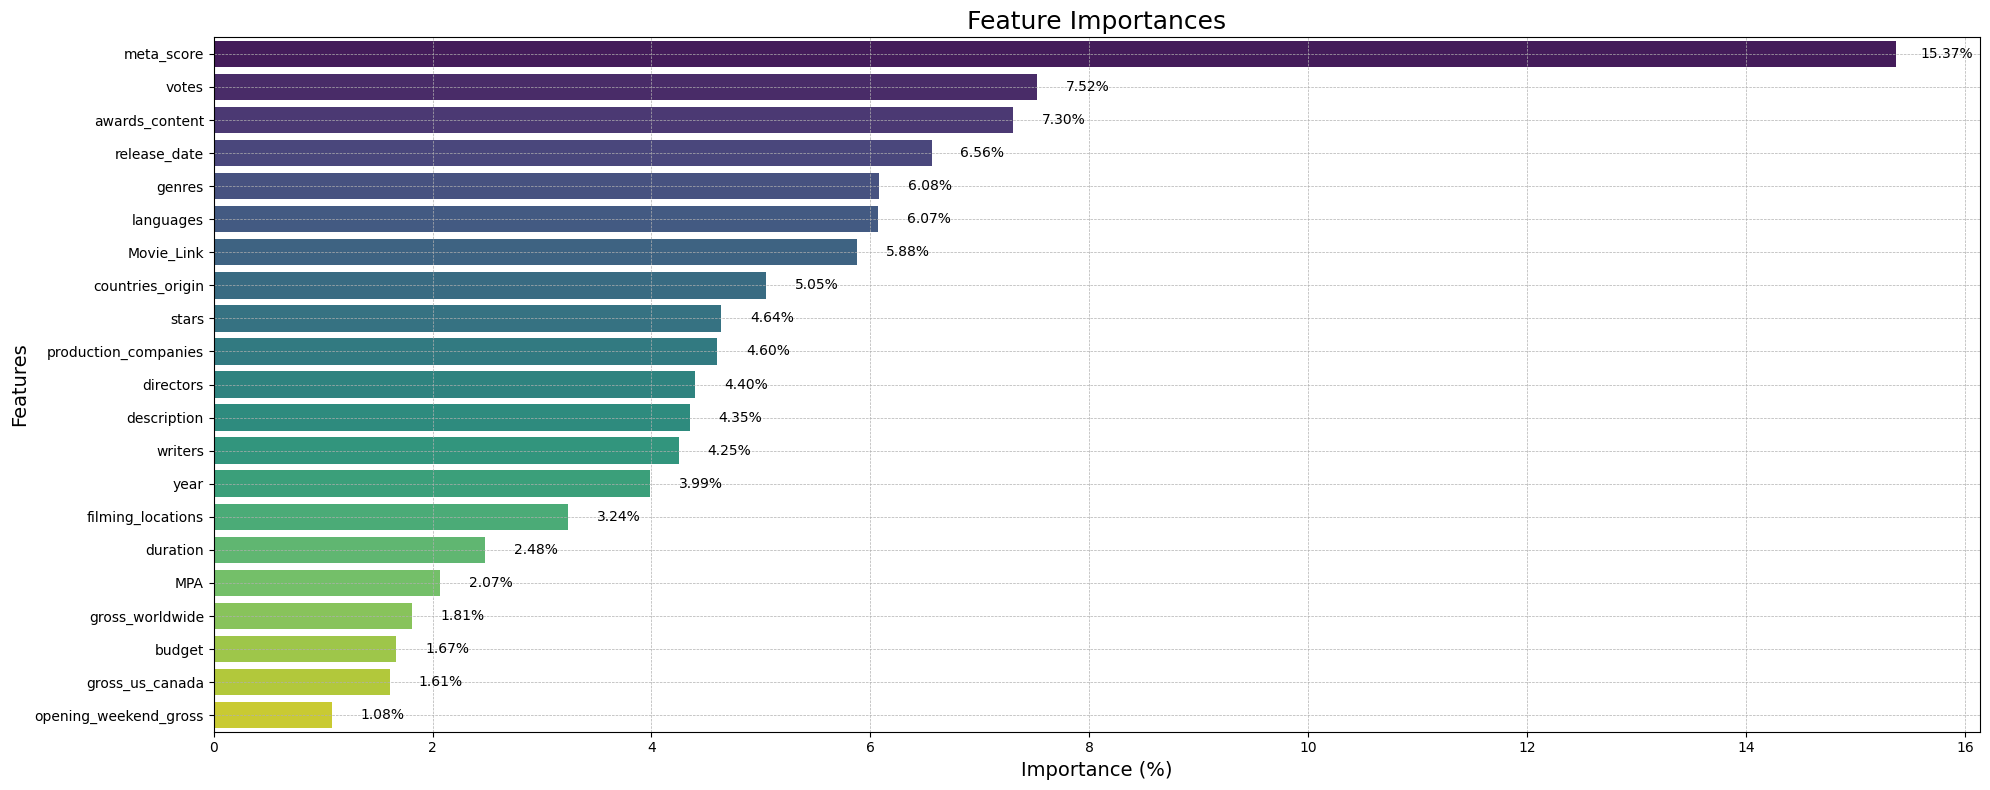

In [ ]:
# Plot feature importances
plt.figure(figsize=(20, 8))
# Sorting the features dataframe by 'Importance (%)' in descending order before plotting
features_sorted = features.sort_values(by='Importance (%)', ascending=False)
barplot = sns.barplot(x='Importance (%)', y='Features', data=features_sorted, palette="viridis")
plt.title('Feature Importances', fontsize=18)
plt.xlabel('Importance (%)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for p in barplot.patches:
    barplot.annotate(f"{format(p.get_width(), '.2f')}%", (p.get_width() + 0.35, p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(9, 0), textcoords='offset points')
plt.tight_layout()
plt.show()

###Statistic Analysis

#### Top rated movies

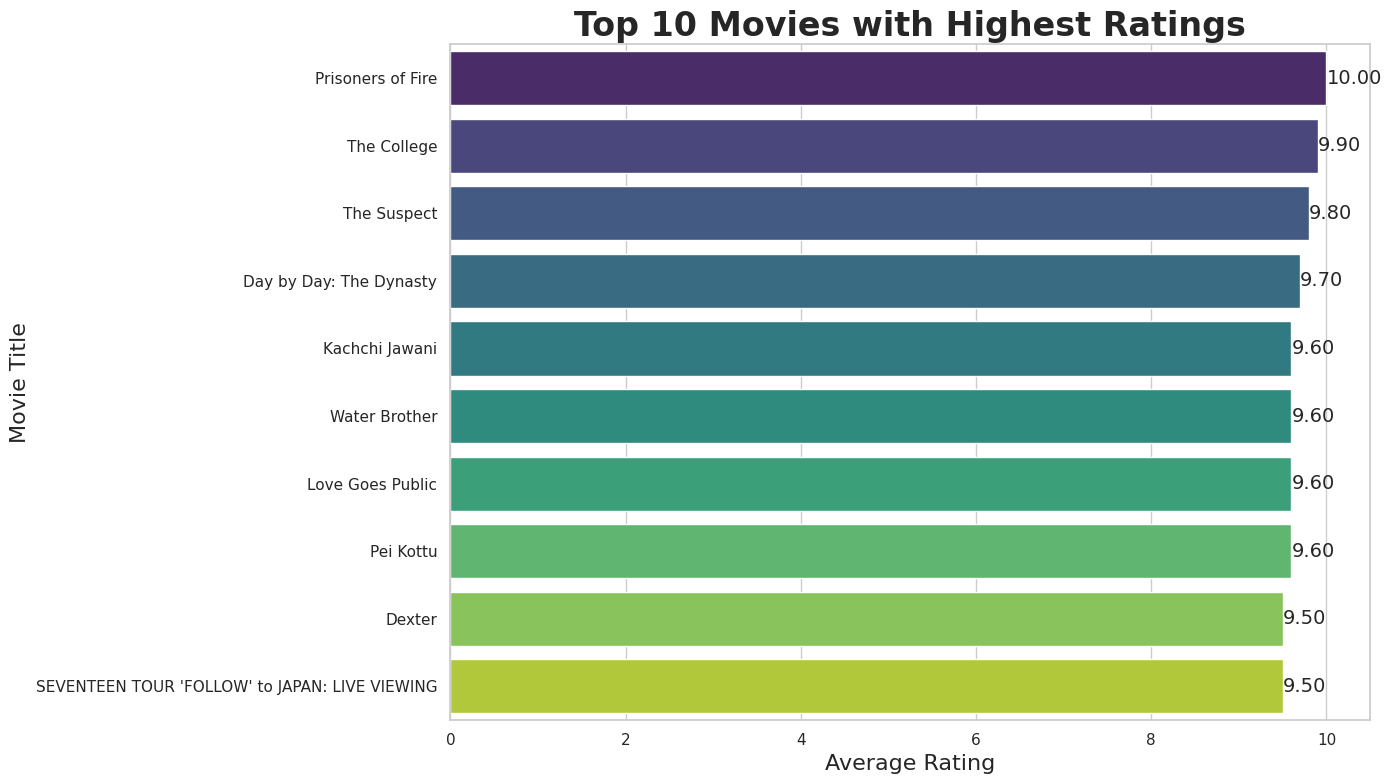

In [82]:
# Step 1: Top 10 Movies by Ratings
top_movies = datawithid[['title', 'rating']].sort_values(by='rating', ascending=False).head(10)
# Create a larger figure for Top 15 Movies
plt.figure(figsize=(14, 8))

# Bar plot for Top 10 Movies with fix for FutureWarning
sns.barplot(x='rating', y='title', data=top_movies, hue='title', palette='viridis', dodge=False, legend=False)

# Adding titles and labels for Top Movies (removing the emoji to avoid the UserWarning)
plt.title('Top 10 Movies with Highest Ratings', fontsize=24, fontweight='bold')
plt.xlabel('Average Rating', fontsize=16)
plt.ylabel('Movie Title', fontsize=16)

# Add data labels on the bars for Top Movies
for p in plt.gca().patches:
    plt.annotate(f'{p.get_width():.2f}',
                 (p.get_width(), p.get_y() + p.get_height()/2),
                 ha='left', va='center', fontsize=14)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#### Countries that produced the most movies

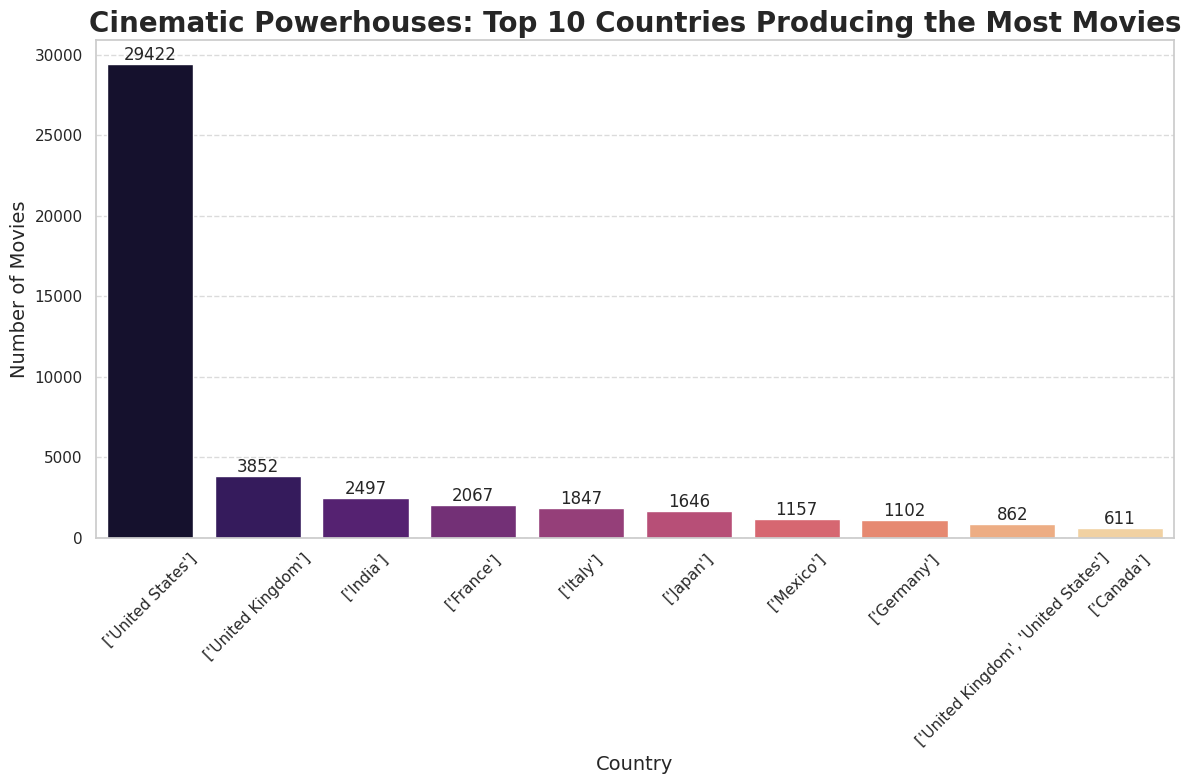

In [81]:
# Group the data by country and count the number of movies
country_counts = datawithid['countries_origin'].value_counts()

# Get the top 10 countries with the most movies
top_10_countries = country_counts.head(10)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 10 countries with fix for FutureWarning
# Using top_15_countries.index for hue and disabling legend
bar_plot = sns.barplot(x=top_10_countries.index, y=top_10_countries.values,
                       hue=top_10_countries.index, palette='magma', dodge=False, legend=False)

# Adding titles and labels (removing the emojis to avoid the UserWarning)
plt.title('Cinematic Powerhouses: Top 10 Countries Producing the Most Movies',
          fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#### Top Grossed Movies

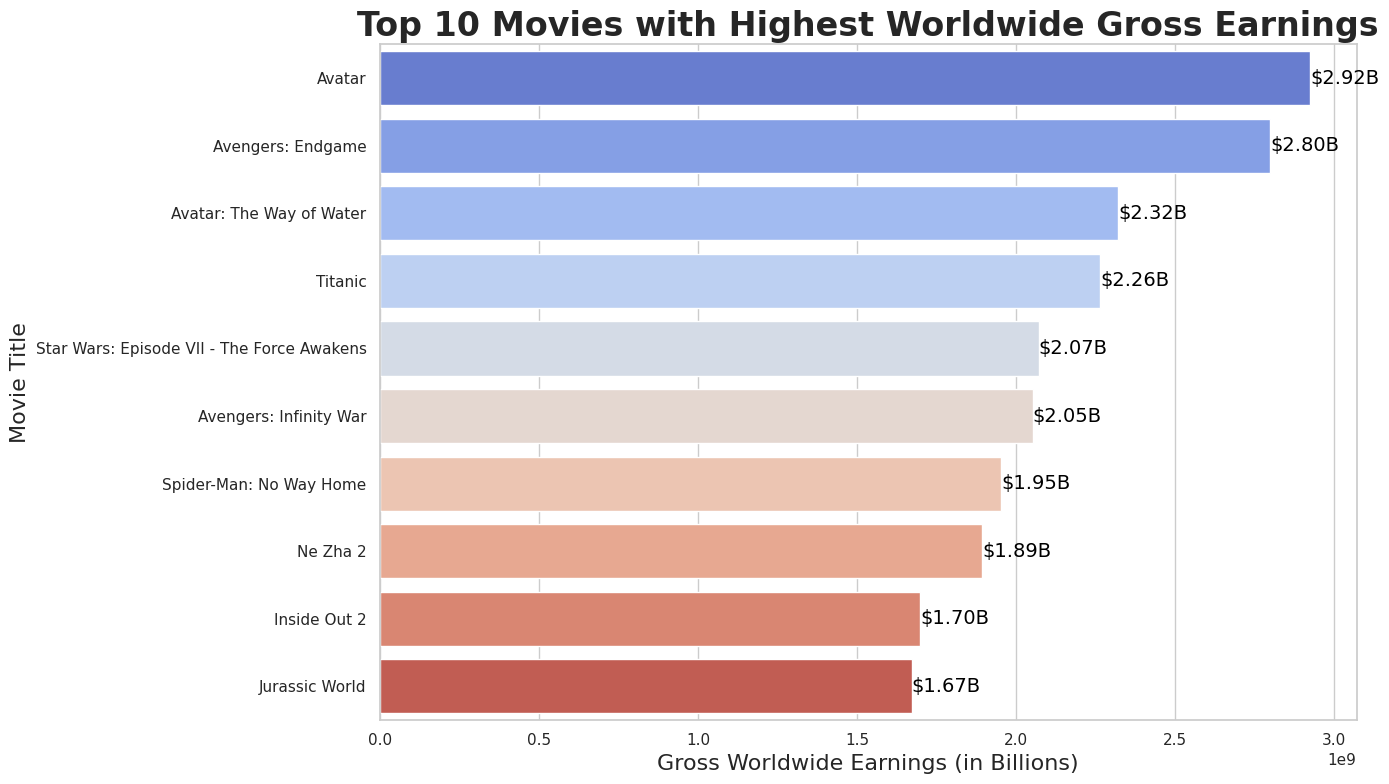

In [83]:
# Ensure data is sorted correctly
top_grossing_movies = datawithid[['title', 'gross_worldwide']].dropna().sort_values(by='gross_worldwide', ascending=False).head(10)

# Set the style for a clean visualization
sns.set(style="whitegrid")

# Create a larger figure
plt.figure(figsize=(14, 8))

# Create a barplot
# using top_grossing_movies['title'] for hue and disabling legend
sns.barplot(x='gross_worldwide', y='title', data=top_grossing_movies, hue='title', palette='coolwarm', dodge=False, legend=False)

# Add chart labels and title
plt.title('Top 10 Movies with Highest Worldwide Gross Earnings', fontsize=24, fontweight='bold')  # Removing emoji
plt.xlabel('Gross Worldwide Earnings (in Billions)', fontsize=16)
plt.ylabel('Movie Title', fontsize=16)

# Add data labels
for p in plt.gca().patches:
    plt.annotate(f'${p.get_width()/1e9:.2f}B',  # Convert to billions
                 (p.get_width(), p.get_y() + p.get_height()/2),
                 ha='left', va='center', fontsize=14, color='black')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()